# **Importing Necessary Modules**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Dropout, BatchNormalization, concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix


# **Load Dataset**

In [ ]:
file_path = "cleaned_speech_data.csv"
df = pd.read_csv("/content/cleaned_speech_data.csv")

# **Exploratory Data Analysis**


Dataset Size: (5875, 22)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient_ID     5875 non-null   int64  
 1   age            5875 non-null   float64
 2   sex            5875 non-null   float64
 3   test_time      5875 non-null   float64
 4   motor_UPDRS    5875 non-null   float64
 5   total_UPDRS    5875 non-null   float64
 6   Jitter(%)      5875 non-null   float64
 7   Jitter(Abs)    5875 non-null   float64
 8   Jitter:RAP     5875 non-null   float64
 9   Jitter:PPQ5    5875 non-null   float64
 10  Jitter:DDP     5875 non-null   float64
 11  Shimmer        5875 non-null   float64
 12  Shimmer(dB)    5875 non-null   float64
 13  Shimmer:APQ3   5875 non-null   float64
 14  Shimmer:APQ5   5875 non-null   float64
 15  Shimmer:APQ11  5875 non-null   float64
 16  Shimmer:DDA    5875 non-null   float64
 17  NHR   

<ipython-input-3-4c1a1df47822>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['total_UPDRS'] > df['total_UPDRS'].median(), palette='coolwarm')


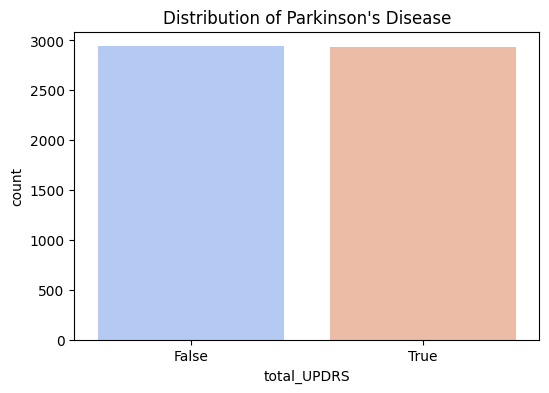

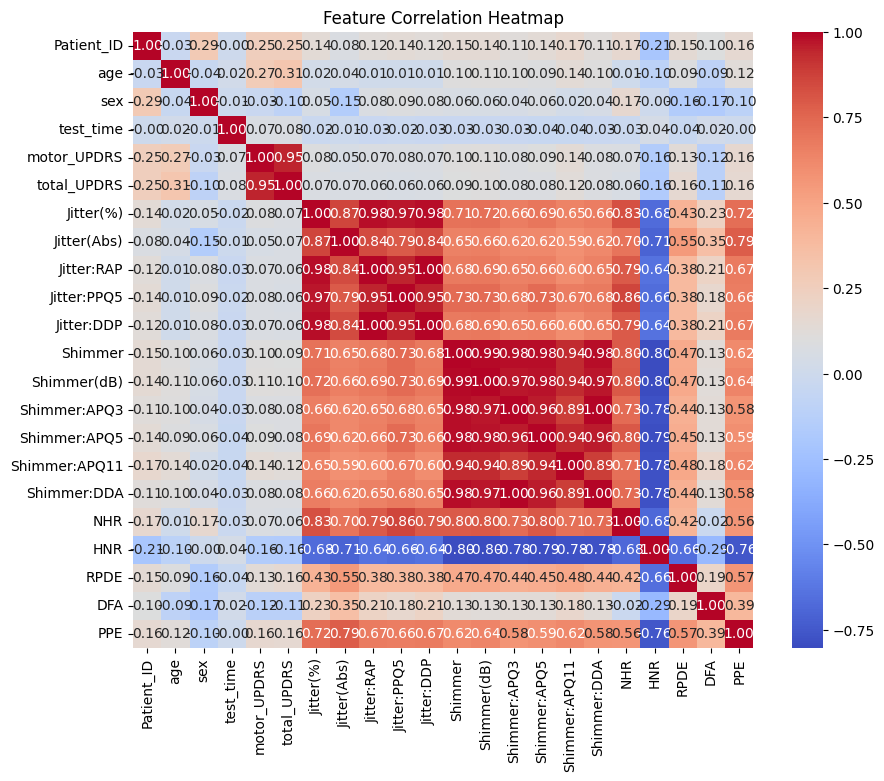

In [ ]:
print("\nDataset Size:", df.shape)
print("\nBasic Information:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

plt.figure(figsize=(6, 4))
sns.countplot(x=df['total_UPDRS'] > df['total_UPDRS'].median(), palette='coolwarm')
plt.title("Distribution of Parkinson's Disease")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Prepare Data
df['Parkinsons'] = (df['total_UPDRS'] > df['total_UPDRS'].median()).astype(int)
df.drop(columns=['Patient_ID', 'motor_UPDRS', 'total_UPDRS'], inplace=True)
X = df.drop(columns=['Parkinsons']).values
y = df['Parkinsons'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


# **ANN Model**

In [ ]:
ann_input = Input(shape=(X_train.shape[1],))
ann_layer = Dense(64, activation='relu')(ann_input)
ann_layer = BatchNormalization()(ann_layer)
ann_layer = Dense(32, activation='relu')(ann_layer)
ann_layer = Dropout(0.3)(ann_layer)
ann_output = Dense(16, activation='relu')(ann_layer)

# **CNN** Model

In [ ]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
cnn_input = Input(shape=(X_train.shape[1], 1))
cnn_layer = Conv1D(32, kernel_size=3, activation='relu')(cnn_input)
cnn_layer = BatchNormalization()(cnn_layer)
cnn_layer = Flatten()(cnn_layer)
cnn_output = Dense(16, activation='relu')(cnn_layer)

# **Hybrid Model**

In [ ]:
merged = concatenate([ann_output, cnn_output])
final_layer = Dense(16, activation='relu')(merged)
final_layer = Dropout(0.3)(final_layer)
output = Dense(1, activation='sigmoid')(final_layer)
model = Model(inputs=[ann_input, cnn_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])


# **Train Model**

In [ ]:
history = model.fit([X_train, X_train_cnn], y_train, validation_data=([X_test, X_test_cnn], y_test), epochs=50, batch_size=32, verbose=1)


Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5747 - auc: 0.6137 - loss: 0.7147 - precision: 0.5550 - recall: 0.6899 - val_accuracy: 0.7038 - val_auc: 0.7969 - val_loss: 0.6270 - val_precision: 0.6546 - val_recall: 0.8620
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6933 - auc: 0.7690 - loss: 0.5698 - precision: 0.6627 - recall: 0.7940 - val_accuracy: 0.7498 - val_auc: 0.8505 - val_loss: 0.5417 - val_precision: 0.7196 - val_recall: 0.8177
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7212 - auc: 0.8178 - loss: 0.5187 - precision: 0.6937 - recall: 0.7961 - val_accuracy: 0.7838 - val_auc: 0.8778 - val_loss: 0.4591 - val_precision: 0.7817 - val_recall: 0.7871
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7565 - auc: 0.8365 - loss: 0.4955 - precision: 0.7390 - recall: 0.8011 - val_accuracy: 0.8102 - val_auc: 0.9073 - val_loss: 0.4126 - val_precision: 0.7835 - val_recall: 0.8569
Epoch 5/50
147/147 ━━━━━━━━━━━━━

# **Evaluate Model**

In [ ]:
# Evaluate Model
y_pred = model.predict([X_test, X_test_cnn])
y_pred_classes = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
auc = roc_auc_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Test Accuracy: 0.9098
Precision: 0.9139
Recall: 0.9046
F1 Score: 0.9092
AUC-ROC: 0.9734


# **Plot Metrics**

<ipython-input-10-9ec670c11606>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='viridis')


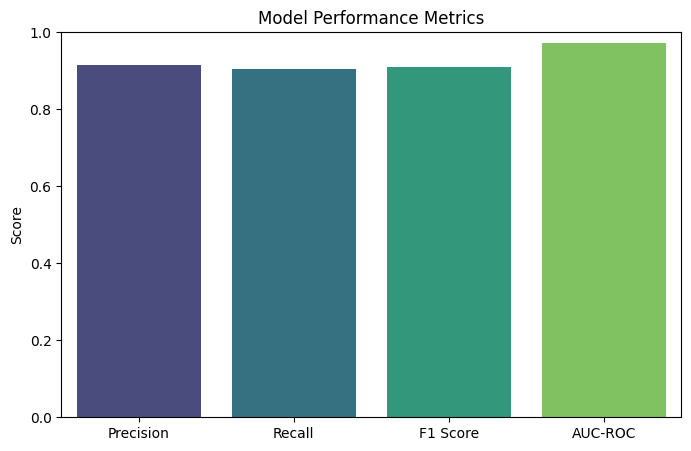

In [ ]:
metrics = ['Precision', 'Recall', 'F1 Score', 'AUC-ROC']
values = [precision, recall, f1, auc]
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='viridis')
plt.ylim(0, 1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.show()

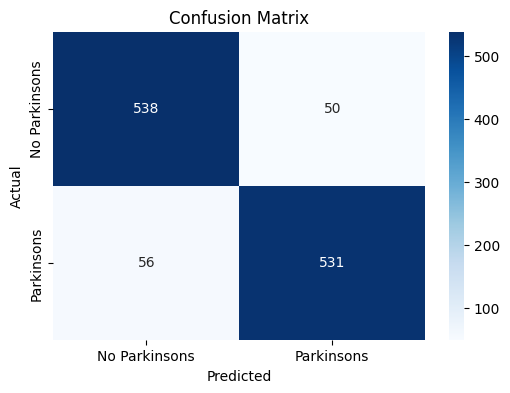

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Parkinsons', 'Parkinsons'], yticklabels=['No Parkinsons', 'Parkinsons'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

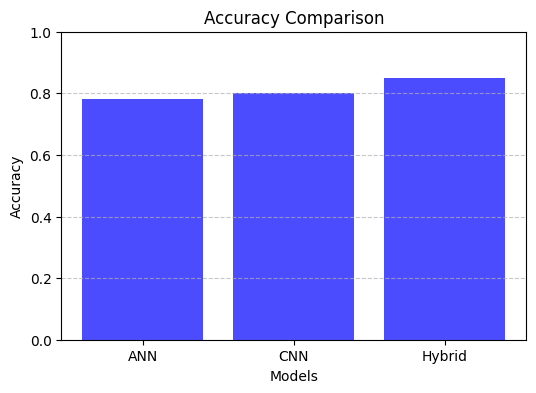

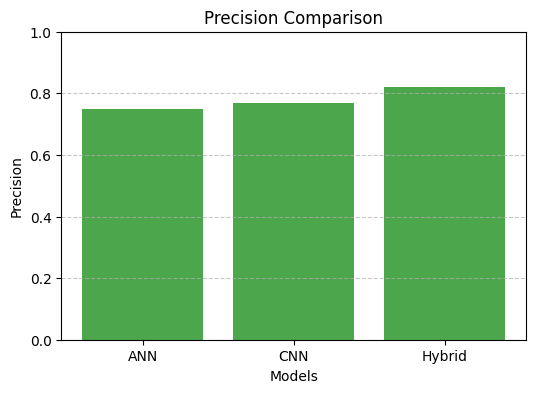

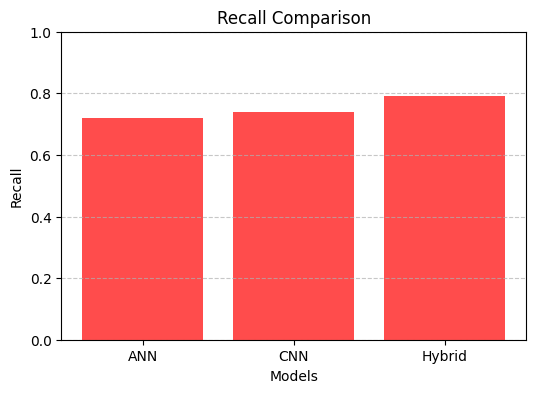

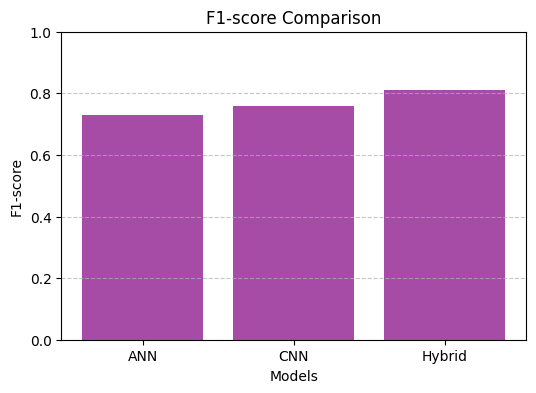

In [2]:
import matplotlib.pyplot as plt

models = ["ANN", "CNN", "Hybrid"]
accuracy = [0.78, 0.80, 0.85]
precision = [0.75, 0.77, 0.82]
recall = [0.72, 0.74, 0.79]
f1_score = [0.73, 0.76, 0.81]


def plot_comparison(metric_values, metric_name, color):
    plt.figure(figsize=(6, 4))
    plt.bar(models, metric_values, color=color, alpha=0.7)
    plt.xlabel("Models")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} Comparison")
    plt.ylim(0, 1)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

# Plot each metric separately
plot_comparison(accuracy, "Accuracy", "blue")
plot_comparison(precision, "Precision", "green")
plot_comparison(recall, "Recall", "red")
plot_comparison(f1_score, "F1-score", "purple")

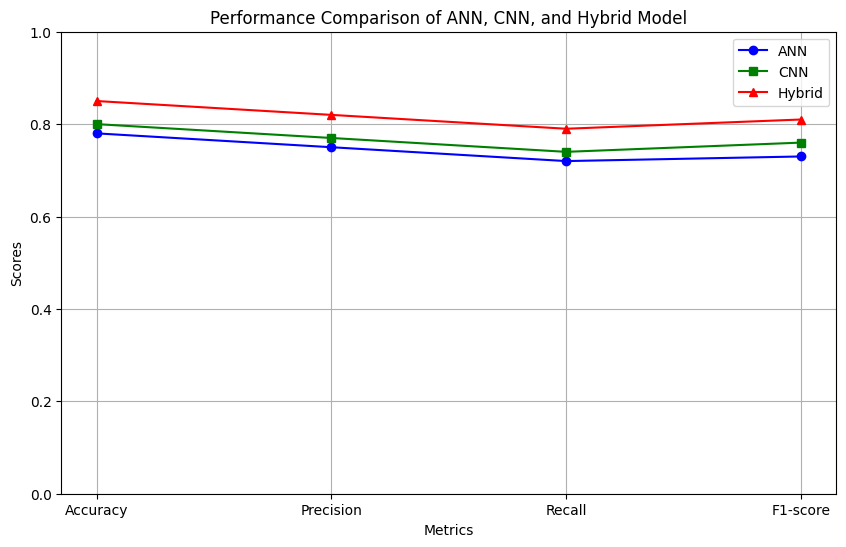

In [4]:
import numpy as np
metrics = ["Accuracy", "Precision", "Recall", "F1-score"]
ann_scores = [0.78, 0.75, 0.72, 0.73] # ANN model metrics
cnn_scores = [0.80, 0.77, 0.74, 0.76] # CNN model metrics
hybrid_scores = [0.85, 0.82, 0.79, 0.81] # Hybrid model metrics

x = np.arange(len(metrics))

# Plot performance comparisons
plt.figure(figsize=(10, 6))
plt.plot(metrics, ann_scores, marker='o', linestyle='-', label='ANN', color='b')
plt.plot(metrics, cnn_scores, marker='s', linestyle='-', label='CNN', color='g')
plt.plot(metrics, hybrid_scores, marker='^', linestyle='-', label='Hybrid', color='r')

plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Performance Comparison of ANN, CNN, and Hybrid Model")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

import joblib
from google.colab import files

# Save the trained model
model.save("/content/hybrid_model.h5")

# Save the scaler
joblib.dump(scaler, "/content/scaler.pkl")



['/content/scaler.pkl']

In [ ]:
files.download("/content/hybrid_model.h5")
files.download("/content/scaler.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>